# Propagation Principles in Simple Graphs
We examine graphs that have small vertex-set (up to 20) and have a hub and spoke structure, meaning
they have few hubs and the rest of the vertices tend to be leaves. We first consider graphs with no cycles at all.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.stats import poisson
from tqdm import tqdm

# plt.ioff()
plt.ion()

################ Functions #######################################
from graphsfunctions import *


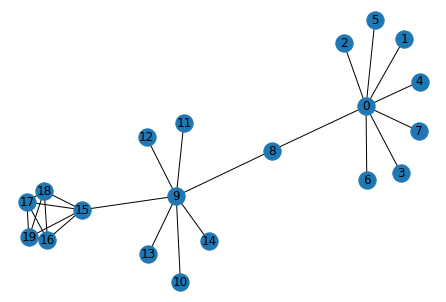

In [2]:
# Testing a little spider graph
G = nx.Graph()
G.add_nodes_from(range(20))
G.add_edges_from([(0, i) for i in range(1, 8)])
G.add_edge(0, 8)
G.add_edge(8, 9)
G.add_edges_from([(9, i) for i in range(10, 15)])
G.add_edge(15, 9)
G.add_edges_from([(i, j) for i in range(15, 19) for j in range(i + 1, 20)])
nx.draw(G, with_labels=True)
plt.show()

The "little Spider" contains a bigger star on 0, connected via 8 to a smaller star on 9, and a K5.
We want to explore its propagation properties.


100%|██████████| 20/20 [00:00<00:00, 739.91it/s]


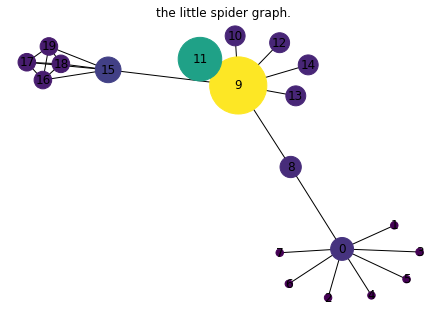

In [3]:
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W85[11], node_size=W85[11]*10000)
plt.title("the little spider graph.")
plt.show()


The plot shows, both by node size as well as by color code, the stationary propagation with biased concentrated on noe 11, with restart probability of 0.15.

100%|██████████| 20/20 [00:00<00:00, 705.24it/s]


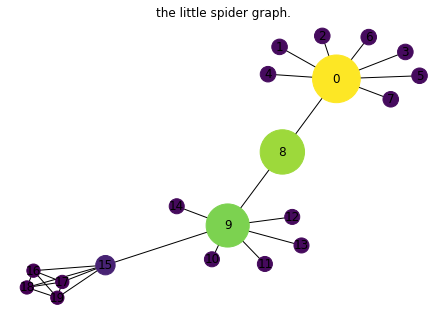

In [4]:
H, W = pageRanksConcentratedBiasG(G, alpha=0.85)
nx.draw(H, with_labels=True, node_color=W[8], node_size=W[8]*10000)
plt.title("the little spider graph.")
plt.show()


This is the same type of plot, but propagation from 8.

Now we are going top demonstrate how the propgation changes from each vertex, and with various alpha values, by way of heatmaps

100%|██████████| 20/20 [00:00<00:00, 1891.54it/s]


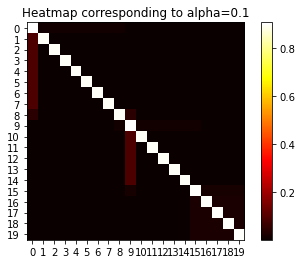

100%|██████████| 20/20 [00:00<00:00, 1848.61it/s]


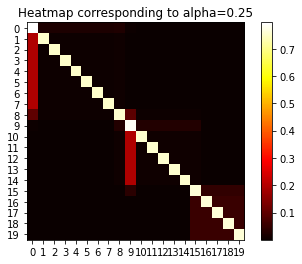

100%|██████████| 20/20 [00:00<00:00, 1544.21it/s]


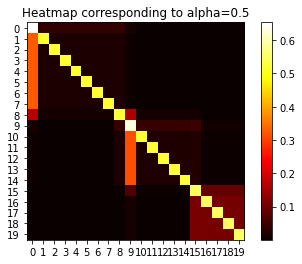

100%|██████████| 20/20 [00:00<00:00, 764.30it/s]


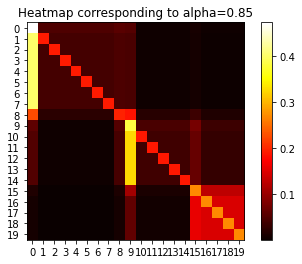

100%|██████████| 20/20 [00:00<00:00, 587.92it/s]


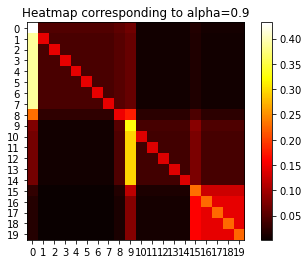

In [5]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.1)
heatmap(W10, "Heatmap corresponding to alpha=0.1")
plt.show()
plt.close()

H, W25 = pageRanksConcentratedBiasG(G, alpha=0.25)
heatmap(W25, "Heatmap corresponding to alpha=0.25")
plt.show()
plt.close()

H, W50 = pageRanksConcentratedBiasG(G, alpha=0.5)
heatmap(W50, "Heatmap corresponding to alpha=0.5")
plt.show()
plt.close()

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap corresponding to alpha=0.85")
plt.show()
plt.close()

H, W90 = pageRanksConcentratedBiasG(G, alpha=0.9)
heatmap(W90, "Heatmap corresponding to alpha=0.9")
plt.savefig("Heatmap Little Spider alpha=0.9.png")
plt.show()
plt.close()

Interestingly the alpha value doesn't seem to change the structure, but just the instensities. But this graph is very simple. We also note some trivial facts such that hubs retain more heat, and the leaves are cold. Because highly connected nodes receive heat from many sources. If we think in terms of random walk, they are more likely to be visited because they are connected to more nodes. Also notice that node 8 which connects 2 hot hubs is also interesting.

Now lets try the  smae trick with a different dog, I mean graph...

100%|██████████| 20/20 [00:00<00:00, 735.86it/s]


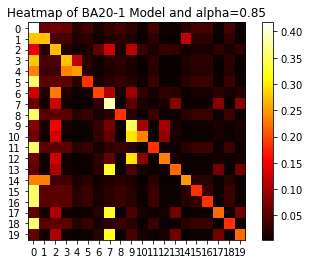

In [6]:
seed = 42
G = nx.barabasi_albert_graph(n=20, m=1, seed=seed)
H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA20-1 Model and alpha=0.85")



100%|██████████| 20/20 [00:00<00:00, 1713.67it/s]


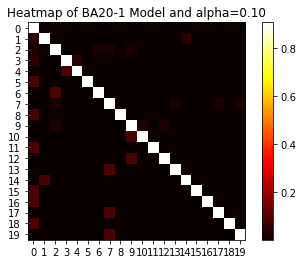

In [7]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA20-1 Model and alpha=0.10")


100%|██████████| 20/20 [00:00<00:00, 536.36it/s]


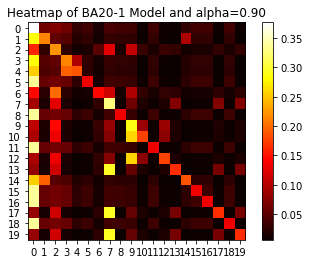

In [8]:
H, W90 = pageRanksConcentratedBiasG(G, alpha=0.90)
heatmap(W90, "Heatmap of BA20-1 Model and alpha=0.90")


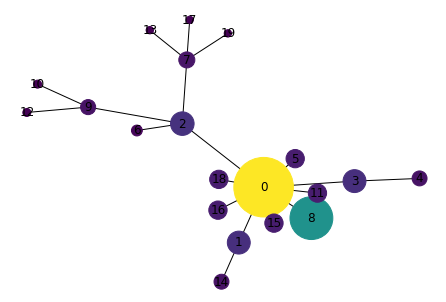

In [9]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*10000)


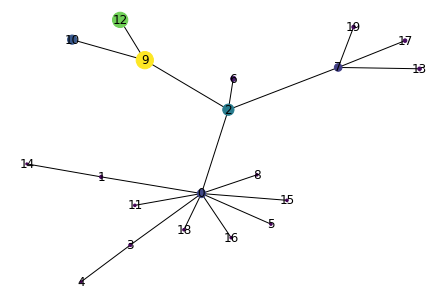

In [10]:
nx.draw(H, with_labels=True, node_color=W85[12], node_size=W85[12]*1000)


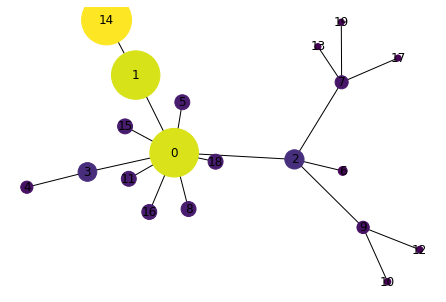

In [11]:
nx.draw(H, with_labels=True, node_color=W85[14], node_size=W85[14]*10000)


Now we do they same experiment with a more complex graph...

100%|██████████| 25/25 [00:00<00:00, 1056.76it/s]


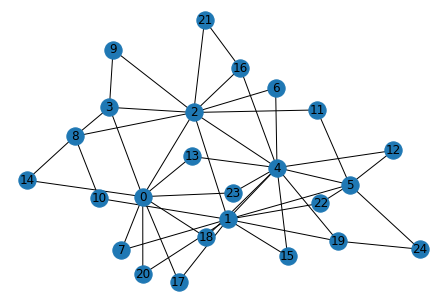

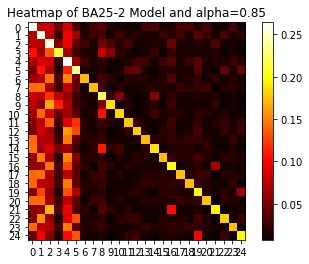

In [12]:
seed = 42
G = nx.barabasi_albert_graph(n=25, m=2, seed=seed)

nx.draw(G, with_labels=True)

H, W85 = pageRanksConcentratedBiasG(G, alpha=0.85)
heatmap(W85, "Heatmap of BA25-2 Model and alpha=0.85")


100%|██████████| 25/25 [00:00<00:00, 1629.74it/s]


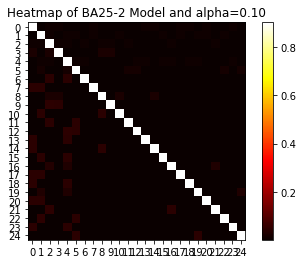

In [14]:
H, W10 = pageRanksConcentratedBiasG(G, alpha=0.10)
heatmap(W10, "Heatmap of BA25-2 Model and alpha=0.10")


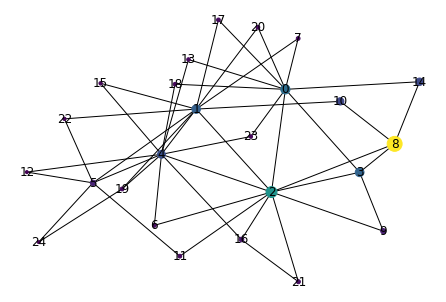

In [15]:
nx.draw(H, with_labels=True, node_color=W85[8], node_size=W85[8]*1000)


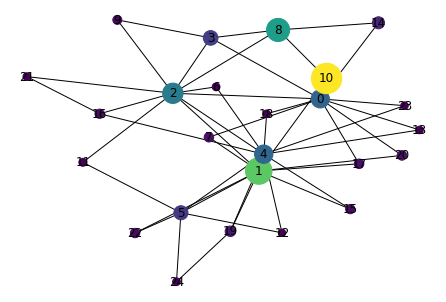

In [18]:
nx.draw(H, with_labels=True, node_color=W85[10], node_size=W85[10]*5000)


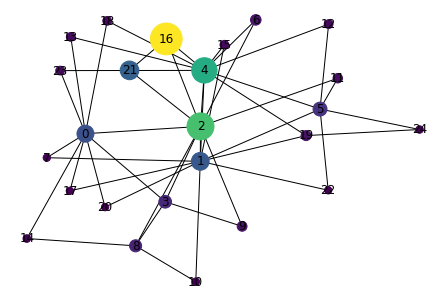

In [17]:
nx.draw(H, with_labels=True, node_color=W85[16], node_size=W85[16]*5000)


I think it is clear now  that propagation strongly depends on the distance from the propagating source and on the degree...